# Imports 

In [3]:
print('hi')

hi


In [4]:
import sys
sys.path

['C:\\Users\\Eesh Gupta\\Documents\\RU Research\\Chakram\\Multimode-Conditional-Displacements\\hpc_runs\\multimode_circle_grape\\sample workflow',
 'C:\\Users\\Eesh Gupta\\anaconda\\python38.zip',
 'C:\\Users\\Eesh Gupta\\anaconda\\DLLs',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib',
 'C:\\Users\\Eesh Gupta\\anaconda',
 '',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages',
 'c:\\users\\eesh gupta\\documents\\ru research\\chakram\\qoc',
 'c:\\users\\eesh gupta\\documents\\ru research\\chakram\\quantum-optimal-control',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\locket-0.2.1-py3.8.egg',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\win32',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Eesh Gupta\\.ipython']

In [5]:
%matplotlib inline
import os
import sys
import inspect
import numpy as np
from scipy.special import factorial
import h5py

#data_path = '/data'     ... data path specified later
#data_path
#initial_pulse = '../pulses/example_pulses/transmon_cat_initial_pulse.h5'
from h5py import File
import matplotlib.pyplot as plt
from pylab import*
from qutip import*

from scipy import interpolate
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)


In [16]:
from quantum_optimal_control.helper_functions.grape_functions import *
from quantum_optimal_control.main_grape.grape import Grape
from quantum_optimal_control import*

In [7]:
%load_ext autoreload
%autoreload 2

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

# 3DMM2 parameters

In [17]:
# chi = Peak splitting MHz
chis = 2*array([-1.1962, -0.8676]) 
kappas  = array([18,9.02]) # kHz

# Multimode circle grape

In [26]:
#TODO: Figure out why relative import doesn't work
from circle_grape_v3 import *

done


C:\Users\Eesh Gupta\Documents\RU Research\Chakram\Multimode-Conditional-Displacements\hpc_runs\multimode_circle_grape\sample workflow\circle_grape_v3.py:416: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if int(around(self.nqinit,0)) is 0:


In [27]:
transmon_levels = 2

#  Params :  $\alpha = 30.0 , \delta_c = -0.030$ GHz, $\tau = 500$ ns, $\Omega_{max} =1$ MHz

In [28]:
mode = 1
mode_levels = 5
chi,kappa = chis[mode]*1e-3,kappas[mode]*1e-6
circle_grape_params = {"chis":[chi],"kappas":[kappa],"alpha":10.0,"delta_c":-0.010}

op = multimode_circle_grape_optimal_control(mode_state_num = mode_levels,
                                            number_of_modes = 1,hparams = circle_grape_params,add_disp_kerr=False)




In [29]:
import sys
sys.path

['C:\\Users\\Eesh Gupta\\Documents\\RU Research\\Chakram\\Multimode-Conditional-Displacements\\hpc_runs\\multimode_circle_grape\\sample workflow',
 'C:\\Users\\Eesh Gupta\\anaconda\\python38.zip',
 'C:\\Users\\Eesh Gupta\\anaconda\\DLLs',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib',
 'C:\\Users\\Eesh Gupta\\anaconda',
 '',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages',
 'c:\\users\\eesh gupta\\documents\\ru research\\chakram\\qoc',
 'c:\\users\\eesh gupta\\documents\\ru research\\chakram\\quantum-optimal-control',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\locket-0.2.1-py3.8.egg',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\win32',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Eesh Gupta\\.ipython']

In [30]:
data_path = ''#'/home/eag190/Multimode-Conditional-Displacements/hpc_runs/multimode_circle_grape/sample workflow/data'

In [31]:
states_forbidden_list = []
total_time = 500.0
steps  = 600  #number of points over the total time where amplitudes will be specified

convergence = {'rate': 0.1, 'update_step': 10, 'max_iterations': 10,
               'conv_target': 3e-4, 'learning_rate_decay': 500.0}


reg_coeffs = {'dwdt': 0.1, 'd2wdt2': 1.0e-3, 'forbid_dressed': False,
              'states_forbidden_list':states_forbidden_list,
              'forbidden_coeff_list': [1.0*steps] * len(states_forbidden_list)}



initial_guess = None

ss = op.run_optimal_control(state_transfer = True, initial_states = [0], target_states = [1], 
                        total_time = total_time, steps = steps,max_amp = 1e-3, 
                        taylor_terms = None,is_dressed=False, 
                        convergence = convergence, reg_coeffs =  reg_coeffs,
                        plot_only_g = True,
                        states_forbidden_list = states_forbidden_list,initial_guess = initial_guess, 
                        file_name="g0_to_g1_circlgrape", data_path=data_path, save = True)

data saved at: 00004_g0_to_g1_circlgrape.h5


c:\users\eesh gupta\documents\ru research\chakram\quantum-optimal-control\quantum_optimal_control\helper_functions\data_management.py:13: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  h5py.File.__init__(self, *args, **kwargs)


In [34]:
hf = op.openfile()

In [39]:
hf['error'][-1]

0.43168348

C:\Users\Eesh Gupta\Documents\RU Research\Chakram\Multimode-Conditional-Displacements\hpc_runs\multimode_circle_grape\sample workflow\circle_grape_v3.py:419: SyntaxWarning: "is" with a literal. Did you mean "=="?
  for mm in arange(self.mmnum):


done


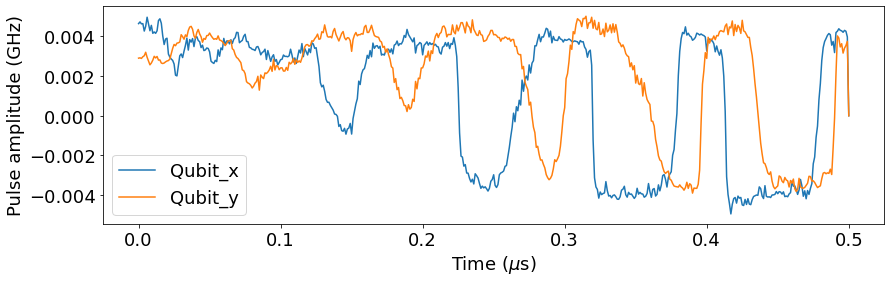

In [41]:
op.plot_pulses()

In [15]:
ss

(array([[-8.5794600e-05, -3.1095400e-04, -9.8785866e-05, ...,
          4.5212900e-04,  4.4902510e-04,  2.8135415e-04],
        [ 4.6793686e-04,  6.2328891e-04,  6.2675978e-04, ...,
          8.0630131e-04,  2.3822548e-04,  8.4377005e-04]], dtype=float32),
 [])

In [16]:
len(ss[0][0])

600

In [17]:
op.fidelity()

AttributeError: 'multimode_circle_grape_optimal_control' object has no attribute 'fidelity'

In [ ]:
import os 
data_path = '/home/eag190/Multimode-Conditional-Displacements/hpc_runs/multimode_circle_grape/sample workflow/data'
file_path = 'test.h5'
file_path_f = os.path.join(data_path, file_path)
file_path_f

In [ ]:
hf = h5py.File(file_path_f, 'w')


In [ ]:
get_dressed_info

In [ ]:
w_c, v_c, dressed_id = get_dressed_info(op.H_rot())

In [ ]:
w_c

In [ ]:
v_c

In [ ]:
dressed_id